In [54]:
import numpy as np
import json
import matplotlib.pyplot as plt
import glob
import re
import pandas as pd
# import seaborn as sns

In [55]:
files = glob.glob('./logs/test/*.txt')
files

['./logs/test/gcn_cav_20_hv_20_testing_hist.txt',
 './logs/test/rule_based_cav_20_hv_40_testing_hist2.txt',
 './logs/test/lstm_cav_20_hv_20_testing_hist.txt',
 './logs/test/rule_based_cav_20_hv_10_testing_hist2.txt',
 './logs/test/gcn_cav_20_hv_30_testing_hist.txt',
 './logs/test/lstm_cav_20_hv_50_testing_hist.txt',
 './logs/test/lstm_cav_20_hv_10_testing_hist.txt',
 './logs/test/lstm_cav_20_hv_40_testing_hist.txt',
 './logs/test/gcn_cav_20_hv_10_testing_hist.txt',
 './logs/test/rule_based_cav_20_hv_30_testing_hist2.txt',
 './logs/test/gcn_cav_20_hv_50_testing_hist.txt',
 './logs/test/rule_based_cav_20_hv_50_testing_hist2.txt',
 './logs/test/gcn_cav_20_hv_40_testing_hist.txt',
 './logs/test/lstm_cav_20_hv_30_testing_hist.txt',
 './logs/test/rule_based_cav_20_hv_20_testing_hist2.txt']

In [56]:
files.sort()

In [57]:
files

['./logs/test/gcn_cav_20_hv_10_testing_hist.txt',
 './logs/test/gcn_cav_20_hv_20_testing_hist.txt',
 './logs/test/gcn_cav_20_hv_30_testing_hist.txt',
 './logs/test/gcn_cav_20_hv_40_testing_hist.txt',
 './logs/test/gcn_cav_20_hv_50_testing_hist.txt',
 './logs/test/lstm_cav_20_hv_10_testing_hist.txt',
 './logs/test/lstm_cav_20_hv_20_testing_hist.txt',
 './logs/test/lstm_cav_20_hv_30_testing_hist.txt',
 './logs/test/lstm_cav_20_hv_40_testing_hist.txt',
 './logs/test/lstm_cav_20_hv_50_testing_hist.txt',
 './logs/test/rule_based_cav_20_hv_10_testing_hist2.txt',
 './logs/test/rule_based_cav_20_hv_20_testing_hist2.txt',
 './logs/test/rule_based_cav_20_hv_30_testing_hist2.txt',
 './logs/test/rule_based_cav_20_hv_40_testing_hist2.txt',
 './logs/test/rule_based_cav_20_hv_50_testing_hist2.txt']

In [58]:
file_name = files[0]

In [59]:
stat_df = pd.DataFrame(columns=['model_name','num_hv','mean','median','std'])

for file_name in files:
    with open(file_name,'r') as f:
        model_name = file_name.split('/')[-1].split('_')[0]
        if model_name == "rule":
            number = file_name.split('/')[-1].split('_')[5]
        
        else:
            number = file_name.split('/')[-1].split('_')[4]
        data = json.load(f)
        raw = np.array(data['episode_reward'])
        mean = raw.mean()
        median = np.median(raw)
        std = raw.std()
        stat_df = stat_df.append({"model_name": model_name,\
                                  "num_hv": int(number),\
                                  "mean":mean,\
                                  "median":median,\
                                  "std":std,\
                                  }, ignore_index=True)

stat_df.replace({'gcn':'GCQ','lstm':'LSTM-Q','rule':'Rule based'},inplace=True)
stat_df['hdv_inflow_rate'] = stat_df['num_hv']/100

In [60]:
# stat_df.to_excel('../papers/stats.xlsx',index=False)

In [61]:
stat_df

,model_name,num_hv,mean,median,std,hdv_inflow_rate
0,GCQ,10,1238.587324,2322.139379,3404.023748,0.1
1,GCQ,20,2497.729190,3001.560572,2307.022418,0.2
2,GCQ,30,3516.979530,3601.024438,1575.634793,0.3
3,GCQ,40,2673.792676,3031.987689,1532.234483,0.4
4,GCQ,50,2240.136469,3416.060184,3431.686045,0.5
5,LSTM-Q,10,2629.401583,3473.509244,1770.907848,0.1
6,LSTM-Q,20,2659.521199,3022.958256,1262.713301,0.2
7,LSTM-Q,30,1700.305594,4115.128633,6193.385445,0.3
8,LSTM-Q,40,3714.190992,3930.502844,754.682413,0.4
9,LSTM-Q,50,2629.083228,3201.087151,1872.248137,0.5


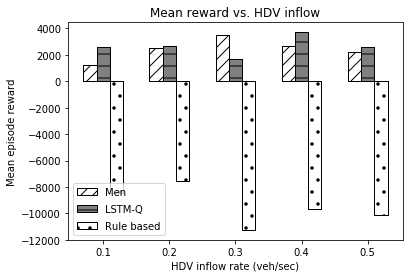

In [62]:
x = [0.1,0.2,0.3,0.4,0.5]

GCQ_means = stat_df[stat_df['model_name'] == 'GCQ']['mean']
LSTMQ_means = stat_df[stat_df['model_name'] == 'LSTM-Q']['mean']
Rulebased_means = stat_df[stat_df['model_name'] == 'Rule based']['mean']

x = np.array(x)  # the label locations

width = 0.02
fig, ax = plt.subplots()

rects1 = ax.bar(x - width, GCQ_means, width, label='Men',color='none',hatch="//", edgecolor='black',zorder = 0)
rects1_b = ax.bar(x - width, GCQ_means, width, color='none', edgecolor='k', zorder=1, lw=1.)

rects2 = ax.bar(x, LSTMQ_means, width, label='LSTM-Q',color='grey',hatch="-", edgecolor='black',zorder = 0)
rects2_b = ax.bar(x, LSTMQ_means, width, color='none', edgecolor='k', zorder=1, lw=1.)

rects3 = ax.bar(x + width, Rulebased_means, width, label='Rule based',color='none',hatch=".", edgecolor='black',zorder = 0)
rects3_b = ax.bar(x + width, Rulebased_means, width, color='none', edgecolor='k', zorder=1, lw=1.)

ax.legend(labelspacing=0.7)
plt.title("Mean reward vs. HDV inflow")
plt.xlabel('HDV inflow rate (veh/sec)')
plt.ylabel('Mean episode reward')

plt.savefig('./figures/mean_reward.png',dpi=400,bbox_inches="tight")

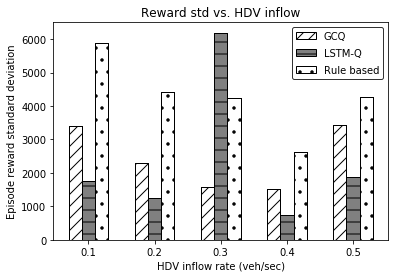

In [67]:
x = [0.1,0.2,0.3,0.4,0.5]

GCQ_means = stat_df[stat_df['model_name'] == 'GCQ']['std']
LSTMQ_means = stat_df[stat_df['model_name'] == 'LSTM-Q']['std']
Rulebased_means = stat_df[stat_df['model_name'] == 'Rule based']['std']

x = np.array(x)  # the label locations

width = 0.02
fig, ax = plt.subplots()

rects1 = ax.bar(x - width, GCQ_means, width, label='GCQ',color='none',hatch="//", edgecolor='black',zorder = 0)
rects1_b = ax.bar(x - width, GCQ_means, width, color='none', edgecolor='k', zorder=1, lw=1.)

rects2 = ax.bar(x, LSTMQ_means, width, label='LSTM-Q',color='grey',hatch="-", edgecolor='black',zorder = 0)
rects2_b = ax.bar(x, LSTMQ_means, width, color='none', edgecolor='k', zorder=1, lw=1.)

rects3 = ax.bar(x + width, Rulebased_means, width, label='Rule based',color='none',hatch=".", edgecolor='black',zorder = 0)
rects3_b = ax.bar(x + width, Rulebased_means, width, color='none', edgecolor='k', zorder=1, lw=1.)

plt.title("Reward std vs. HDV inflow")
plt.xlabel('HDV inflow rate (veh/sec)')
ax.legend(edgecolor='k',labelspacing=0.7)
plt.ylabel('Episode reward standard deviation')
plt.savefig('./figures/std_reward.png',dpi=400,bbox_inches="tight")

In [64]:

# ax = sns.barplot(x='hdv_inflow_rate',y='mean',hue='model_name',data=stat_df,color="white",edgecolor='black')

# hatches = itertools.cycle(['.','//', '+', '-', 'x', '\\', '*', 'o', 'O', '.'])
# colors = itertools.cycle(['r','g','b'])
# for i, bar in enumerate(ax.patches):
#     if i % 5 == 0:
#         hatch = next(hatches)
#     bar.set_hatch(hatch)
# ax.legend(shadow=True)
    
# plt.title("Mean reward vs. HDV inflow")
# plt.xlabel('HDV inflow rate (veh/sec)')
# plt.ylabel('Mean episode reward')

# # plt.savefig('../papers/figures/mean_reward.png',dpi=400,bbox_inches="tight")

In [65]:
sns.barplot(x='hdv_inflow_rate',y='median',hue='model_name',data=stat_df)
plt.title("Median reward vs. HDV inflow")
plt.xlabel('HDV inflow rate (veh/sec)')
plt.ylabel('Median episode reward')
plt.savefig('../papers/figures/median_reward.png',dpi=400,bbox_inches="tight")


NameError: name 'sns' is not defined

In [ ]:
sns.barplot(x='hdv_inflow_rate',y='std',hue='model_name',data=stat_df)
plt.title("Reward std vs. HDV inflow")
plt.xlabel('HDV inflow rate (veh/sec)')
plt.ylabel('Episode reward standard deviation')
plt.savefig('../papers/figures/std_reward.png',dpi=400,bbox_inches="tight")

## number of steps measure

In [66]:
stat_df2 = pd.DataFrame(columns=['model_name','num_hv','mean','median','std'])

for file_name in files:
    with open(file_name,'r') as f:
        model_name = file_name.split('/')[-1].split('_')[0]
        if model_name == "rule":
            number = file_name.split('/')[-1].split('_')[5]
            col_name = 'num_steps'
        else:
            number = file_name.split('/')[-1].split('_')[4]
            col_name = 'nb_steps'
        data = json.load(f)
        raw = np.array(data[col_name])
        mean = raw.mean()
        median = np.median(raw)
        std = raw.std()
        stat_df2 = stat_df2.append({"model_name": model_name,\
                                  "num_hv": int(number),\
                                  "mean":mean,\
                                  "median":median,\
                                  "std":std,\
                                  }, ignore_index=True)

stat_df2.replace({'gcn':'GCQ','lstm':'LSTM-Q','rule':'Rule based'},inplace=True)
stat_df2['hdv_inflow_rate'] = stat_df['num_hv']/100

In [22]:
stat_df2

,model_name,num_hv,mean,median,std,hdv_inflow_rate
0,GCQ,10,1369.6,1340.5,231.473195,0.1
1,GCQ,20,1456.2,1484.0,206.603872,0.2
2,GCQ,30,1485.9,1502.5,180.152408,0.3
3,GCQ,40,1421.9,1437.5,211.819003,0.4
4,GCQ,50,1479.8,1435.5,233.732240,0.5
5,LSTM-Q,10,1513.9,1477.0,307.109899,0.1
6,LSTM-Q,20,1538.8,1452.5,262.654831,0.2
7,LSTM-Q,30,1350.8,1410.0,244.877847,0.3
8,LSTM-Q,40,1460.4,1407.5,261.397093,0.4
9,LSTM-Q,50,1460.9,1476.0,270.875045,0.5


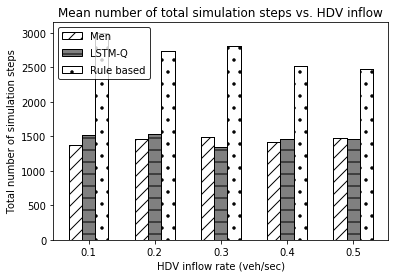

In [50]:
x = [0.1,0.2,0.3,0.4,0.5]

GCQ_means = stat_df2[stat_df2['model_name'] == 'GCQ']['mean']
LSTMQ_means = stat_df2[stat_df2['model_name'] == 'LSTM-Q']['mean']
Rulebased_means = stat_df2[stat_df2['model_name'] == 'Rule based']['mean']

x = np.array(x)  # the label locations

width = 0.02
fig, ax = plt.subplots()

rects1 = ax.bar(x - width, GCQ_means, width, label='Men',color='none',hatch="//", edgecolor='black',zorder = 0)
rects1_b = ax.bar(x - width, GCQ_means, width, color='none', edgecolor='k', zorder=1, lw=1.)

rects2 = ax.bar(x, LSTMQ_means, width, label='LSTM-Q',color='grey',hatch="-", edgecolor='black',zorder = 0)
rects2_b = ax.bar(x, LSTMQ_means, width, color='none', edgecolor='k', zorder=1, lw=1.)

rects3 = ax.bar(x + width, Rulebased_means, width, label='Rule based',color='none',hatch=".", edgecolor='black',zorder = 0)
rects3_b = ax.bar(x + width, Rulebased_means, width, color='none', edgecolor='k', zorder=1, lw=1.)

ax.legend(edgecolor='k',labelspacing=0.7)
plt.title("Mean number of total simulation steps vs. HDV inflow")
plt.xlabel('HDV inflow rate (veh/sec)')
plt.ylabel('Total number of simulation steps')

plt.savefig('./figures/mean_num_steps.png',dpi=400,bbox_inches="tight")

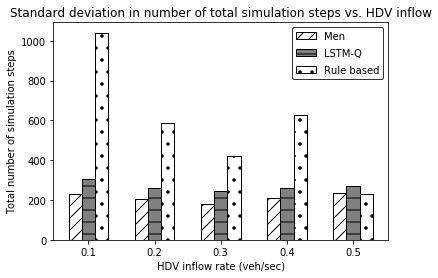

In [49]:
x = [0.1,0.2,0.3,0.4,0.5]

GCQ_means = stat_df2[stat_df2['model_name'] == 'GCQ']['std']
LSTMQ_means = stat_df2[stat_df2['model_name'] == 'LSTM-Q']['std']
Rulebased_means = stat_df2[stat_df2['model_name'] == 'Rule based']['std']

x = np.array(x)  # the label locations

width = 0.02
fig, ax = plt.subplots()

rects1 = ax.bar(x - width, GCQ_means, width, label='Men',color='none',hatch="//", edgecolor='black',zorder = 0)
rects1_b = ax.bar(x - width, GCQ_means, width, color='none', edgecolor='k', zorder=1, lw=1.)

rects2 = ax.bar(x, LSTMQ_means, width, label='LSTM-Q',color='grey',hatch="-", edgecolor='black',zorder = 0)
rects2_b = ax.bar(x, LSTMQ_means, width, color='none', edgecolor='k', zorder=1, lw=1.)

rects3 = ax.bar(x + width, Rulebased_means, width, label='Rule based',color='none',hatch=".", edgecolor='black',zorder = 0)
rects3_b = ax.bar(x + width, Rulebased_means, width, color='none', edgecolor='k', zorder=1, lw=1.)

ax.legend(edgecolor='k',labelspacing=0.7)

plt.title("Standard deviation in number of total simulation steps vs. HDV inflow")
plt.xlabel('HDV inflow rate (veh/sec)')
plt.ylabel('Total number of simulation steps')

plt.savefig('./figures/std_num_steps.png',dpi=400,bbox_inches="tight")